<a href="https://colab.research.google.com/github/girishthorat/Fraud-Detection/blob/main/Fraud_Det_Data_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_json('/content/drive/MyDrive/Pattern_Recognition /transactions.txt', lines=True)


In [ ]:
data.shape

(786363, 29)

In [ ]:
data.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
5,830329091,830329091,5000,5000.00,2016-04-19 16:24:27,30.76,In-N-Out #422833,US,US,02,01,fastfood,2020-01-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
6,830329091,830329091,5000,5000.00,2016-05-21 14:50:35,57.28,Krispy Kreme #685312,US,US,02,01,fastfood,2020-05-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
7,830329091,830329091,5000,5000.00,2016-06-03 00:31:21,9.37,Shake Shack #968081,US,US,05,01,fastfood,2021-01-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
8,830329091,830329091,5000,4990.63,2016-06-10 01:21:46,523.67,Burger King #486122,NaN,US,02,01,fastfood,2032-08-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,9.37,NaN,NaN,NaN,True,NaN,NaN,False,False
9,830329091,830329091,5000,5000.00,2016-07-11 10:47:16,164.37,Five Guys #510989,US,US,05,08,fastfood,2020-04-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False


In [ ]:
data['transactionDateTime']= pd.to_datetime(data['transactionDateTime'])
data['currentExpDate']= pd.to_datetime(data['currentExpDate'])
data['accountOpenDate']= pd.to_datetime(data['accountOpenDate'])
data['dateOfLastAddressChange']= pd.to_datetime(data['dateOfLastAddressChange'])

In [ ]:
#missing values num in dictionary 
colWithNoValues= []
colWithMissingValues = {}
Miss_val = {}
for i in data.columns:
    #print(transactions_df[i].head())
    Miss_val[i] = [(data[i] == '').sum()]
    if( Miss_val[i][0] == 786363):
        colWithNoValues.append(i)
    elif( Miss_val[i][0]>1 and Miss_val[i][0] != 786363 ):
        colWithMissingValues[i]= Miss_val[i][0]
        
Miss_val = pd.DataFrame.from_dict(Miss_val)
Miss_val = Miss_val.T

In [ ]:
print(Miss_val)

                          0
accountNumber             0
customerId                0
creditLimit               0
availableMoney            0
transactionDateTime       0
transactionAmount         0
merchantName              0
acqCountry                0
merchantCountryCode       0
posEntryMode              0
posConditionCode          0
merchantCategoryCode      0
currentExpDate            0
accountOpenDate           0
dateOfLastAddressChange   0
cardCVV                   0
enteredCVV                0
cardLast4Digits           0
transactionType           0
echoBuffer                0
currentBalance            0
merchantCity              0
merchantState             0
merchantZip               0
cardPresent               0
posOnPremises             0
recurringAuthInd          0
expirationDateKeyInMatch  0
isFraud                   0


In [ ]:
data.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd','accountNumber','customerId','merchantName','cardLast4Digits'],axis=1,inplace=True)

In [ ]:
data.replace(r'^\s*$', value=np.NaN, regex=True, inplace=True)

In [ ]:
sum([True for idx,row in data.iterrows() if any(row.isnull())]) # rows with NaN

9695

In [ ]:
data.dropna(inplace=True)

In [ ]:
colWithNoValues= []
colWithMissingValues = {}
Miss_val = {}
for i in data.columns:
    #print(transactions_df[i].head())
    Miss_val[i] = [(data[i] == '').sum()]
    if( Miss_val[i][0] == 786363):
        colWithNoValues.append(i)
    elif( Miss_val[i][0]>1 and Miss_val[i][0] != 786363 ):
        colWithMissingValues[i]= Miss_val[i][0]
        
Miss_val = pd.DataFrame.from_dict(Miss_val)
Miss_val = Miss_val.T

In [ ]:
print(Miss_val)

                          0
accountNumber             0
customerId                0
creditLimit               0
availableMoney            0
transactionDateTime       0
transactionAmount         0
merchantName              0
acqCountry                0
merchantCountryCode       0
posEntryMode              0
posConditionCode          0
merchantCategoryCode      0
currentExpDate            0
accountOpenDate           0
dateOfLastAddressChange   0
cardCVV                   0
enteredCVV                0
cardLast4Digits           0
transactionType           0
currentBalance            0
cardPresent               0
expirationDateKeyInMatch  0
isFraud                   0


In [ ]:
data['transactionType'].value_counts()

PURCHASE                736636
REVERSAL                 20062
ADDRESS_VERIFICATION     19970
Name: transactionType, dtype: int64

In [ ]:
data.head(10)

,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,5000,5000.0,2016-08-13 14:27:32,98.55,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,PURCHASE,0.0,False,False,False
1,5000,5000.0,2016-10-11 05:05:54,74.51,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,PURCHASE,0.0,True,False,False
2,5000,5000.0,2016-11-08 09:18:39,7.47,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,PURCHASE,0.0,False,False,False
3,5000,5000.0,2016-12-10 02:14:50,7.47,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,PURCHASE,0.0,False,False,False
4,5000,5000.0,2016-03-24 21:04:46,71.18,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,PURCHASE,0.0,True,False,False
5,5000,5000.0,2016-04-19 16:24:27,30.76,US,US,02,01,fastfood,2020-01-01,2015-08-06,2015-08-06,885,885,PURCHASE,0.0,True,False,False
6,5000,5000.0,2016-05-21 14:50:35,57.28,US,US,02,01,fastfood,2020-05-01,2015-08-06,2015-08-06,885,885,PURCHASE,0.0,True,False,False
7,5000,5000.0,2016-06-03 00:31:21,9.37,US,US,05,01,fastfood,2021-01-01,2015-08-06,2015-08-06,885,885,PURCHASE,0.0,True,False,False
9,5000,5000.0,2016-07-11 10:47:16,164.37,US,US,05,08,fastfood,2020-04-01,2015-08-06,2015-08-06,885,885,PURCHASE,0.0,True,False,False
10,5000,5000.0,2016-09-07 20:22:47,160.18,US,US,02,08,fastfood,2023-05-01,2015-08-06,2015-08-06,885,885,PURCHASE,0.0,True,False,False


In [ ]:
#data.query('cardPresent == 0 & isFraud==1')
data.query('isFraud==1')

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
694,50000,8613.80,165.26,41386.20,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,409,-1849,75,1
971,15000,14113.96,298.85,886.04,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,-4622,18,1
1072,15000,13702.47,406.89,1297.53,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,79,-4438,79,1
1113,15000,8943.58,439.31,6056.42,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,112,-5866,112,1
1321,15000,5223.03,266.09,9776.97,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,249,-4268,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785680,7500,5517.88,385.41,1982.12,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1527,-2054,1527,1
785713,7500,764.48,393.43,6735.52,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1646,-4126,1646,1
785888,250,61.94,370.43,188.06,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2565,-3263,2565,1
786054,20000,20000.00,28.09,0.00,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,660,-4575,660,1


In [ ]:
data.head(10)

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False
5,5000,5000.0,2016-04-19 16:24:27,30.76,In-N-Out #422833,US,US,02,01,fastfood,2020-01-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False
6,5000,5000.0,2016-05-21 14:50:35,57.28,Krispy Kreme #685312,US,US,02,01,fastfood,2020-05-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False
7,5000,5000.0,2016-06-03 00:31:21,9.37,Shake Shack #968081,US,US,05,01,fastfood,2021-01-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False
9,5000,5000.0,2016-07-11 10:47:16,164.37,Five Guys #510989,US,US,05,08,fastfood,2020-04-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False
10,5000,5000.0,2016-09-07 20:22:47,160.18,Auntie Anne's #747964,US,US,02,08,fastfood,2023-05-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [ ]:
# 3) Combining the columns 'cardCVV' and 'enteredCVV' . Later dropping them 
data['isCVVcorrect'] = (data.cardCVV == data.enteredCVV).astype(int)
data = data.drop(['cardCVV', 'enteredCVV'], axis=1)

# 4)COmbinig the column "acqCountry" and "merchantCountryCode" and dropping them later. 
data['isCountrySame'] = (data.acqCountry == data.merchantCountryCode).astype(int)
data = data.drop(['acqCountry', 'merchantCountryCode'], axis=1)

In [ ]:
data[['cardPresent', 'expirationDateKeyInMatch', 'isFraud']] = data[['cardPresent', 'expirationDateKeyInMatch', 'isFraud']].astype(int)

In [ ]:
data.head(10)

,creditLimit,availableMoney,transactionDateTime,transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isCVVcorrect,isCountrySame
0,5000,5000.0,2016-08-13 14:27:32,98.55,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,PURCHASE,0.0,0,0,0,1,1
1,5000,5000.0,2016-10-11 05:05:54,74.51,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,PURCHASE,0.0,1,0,0,1,1
2,5000,5000.0,2016-11-08 09:18:39,7.47,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,PURCHASE,0.0,0,0,0,1,1
3,5000,5000.0,2016-12-10 02:14:50,7.47,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,PURCHASE,0.0,0,0,0,1,1
4,5000,5000.0,2016-03-24 21:04:46,71.18,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,PURCHASE,0.0,1,0,0,1,1
5,5000,5000.0,2016-04-19 16:24:27,30.76,02,01,fastfood,2020-01-01,2015-08-06,2015-08-06,PURCHASE,0.0,1,0,0,1,1
6,5000,5000.0,2016-05-21 14:50:35,57.28,02,01,fastfood,2020-05-01,2015-08-06,2015-08-06,PURCHASE,0.0,1,0,0,1,1
7,5000,5000.0,2016-06-03 00:31:21,9.37,05,01,fastfood,2021-01-01,2015-08-06,2015-08-06,PURCHASE,0.0,1,0,0,1,1
9,5000,5000.0,2016-07-11 10:47:16,164.37,05,08,fastfood,2020-04-01,2015-08-06,2015-08-06,PURCHASE,0.0,1,0,0,1,1
10,5000,5000.0,2016-09-07 20:22:47,160.18,02,08,fastfood,2023-05-01,2015-08-06,2015-08-06,PURCHASE,0.0,1,0,0,1,1


In [ ]:
np.unique(data['posEntryMode'])

array(['02', '05', '09', '80', '90'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776668 entries, 0 to 786362
Data columns (total 38 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   creditLimit                                776668 non-null  int64  
 1   availableMoney                             776668 non-null  float64
 2   transactionAmount                          776668 non-null  float64
 3   currentBalance                             776668 non-null  float64
 4   cardPresent                                776668 non-null  int64  
 5   expirationDateKeyInMatch                   776668 non-null  int64  
 6   isCVVcorrect                               776668 non-null  int64  
 7   isCountrySame                              776668 non-null  int64  
 8   posEntryMode_05                            776668 non-null  uint8  
 9   posEntryMode_09                            776668 non-null  uint8  
 10  posEntry

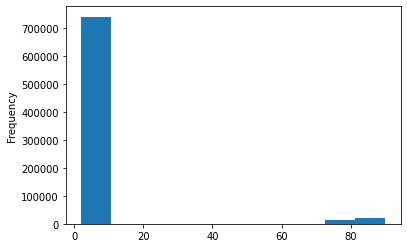

In [ ]:
data['posEntryMode'].plot.hist()

In [ ]:
data['isFraud'].value_counts()

0    764702
1     11966
Name: isFraud, dtype: int64

{0: '02', 1: '05', 2: '09', 3: '80', 4: '90'}

In [ ]:
# Convert categorical features into dummy variables

categor = data.select_dtypes(include=['object']).columns.to_list()
    
data = pd.get_dummies(data, categor, drop_first=True)

   # transactions_df[i] = transactions_df[i].cat.codes
boo = data.select_dtypes(include=['bool']).columns.to_list()
for column in boo:
    data[column] = data[column].astype(int)

In [ ]:
data

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
0,5000,5000.00,98.55,0.00,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,518,-2483,518,0
1,5000,5000.00,74.51,0.00,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,577,-2669,577,0
2,5000,5000.00,7.47,0.00,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,605,-3188,605,0
3,5000,5000.00,7.47,0.00,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,637,-3156,637,0
4,5000,5000.00,71.18,0.00,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,231,-4939,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,1095.04,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1582,-2170,1582,0
786359,50000,48785.04,18.89,1214.96,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1585,-2410,1585,0
786360,50000,48766.15,49.43,1233.85,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1587,-3139,1587,0
786361,50000,48716.72,49.89,1283.28,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1589,-2010,1589,0


In [ ]:
data['Difference_open'] = (data['transactionDateTime'] - data['accountOpenDate']).dt.days
data['Difference_exp'] = (data['transactionDateTime'] - data['currentExpDate']).dt.days
data['Difference_address'] = (data['transactionDateTime'] - data['dateOfLastAddressChange']).dt.days


In [ ]:
data.drop(['transactionDateTime','accountOpenDate','currentExpDate','dateOfLastAddressChange'], axis=1, inplace=True)

In [ ]:
df1 = data.pop('isFraud') # remove column b and store it in df1

data['isFraud']=df1 # add b series as a 'new' column.


In [ ]:
from google.colab import files

data.to_csv('data_backup.csv')
files.download('data_backup.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.to_pickle('Data.pickle')


In [ ]:
Data = pd.read_pickle('/content/drive/MyDrive/Pattern_Recognition /Data.pickle')


In [ ]:
Data

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
0,5000,5000.00,98.55,0.00,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,518,-2483,518,0
1,5000,5000.00,74.51,0.00,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,577,-2669,577,0
2,5000,5000.00,7.47,0.00,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,605,-3188,605,0
3,5000,5000.00,7.47,0.00,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,637,-3156,637,0
4,5000,5000.00,71.18,0.00,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,231,-4939,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,1095.04,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1582,-2170,1582,0
786359,50000,48785.04,18.89,1214.96,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1585,-2410,1585,0
786360,50000,48766.15,49.43,1233.85,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1587,-3139,1587,0
786361,50000,48716.72,49.89,1283.28,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1589,-2010,1589,0
